# Project 2: Earthquake Damage

December 8, 2019  <br>
95-885 Data Science and Big Data  <br>
Team 3: Shikha Goel & Muriel Pokol

## Our Problem: Classifying Earthquake Damage in Buildings

### Motivation
On April 25th, 2015, the deadliest earthquake of the area in the past 85 years struck Nepal.  It had a magnitude of 7.8 and was catastrophic for the area.  Multi-story buildings fell in Kathmandu, and there were over 22,000 injured and almost 9,000 fatalities.1  75 percent of earthquake-related deaths are the product of collapsing structures.2  Earthquakes occur frequently across the globe and an understanding of how to assess and manage their risks is critical.  <br>

We were particularly interested in looking at how to minimize the damage caused by earthquakes because of their unpredictability.  With the current technology, it is not possible to anticipate when a major earthquake will occur, unlike most other natural disasters.  This prompted us to look into how one might minimize injuries and fatalities when there is no warning.  <br> 

By predicting  the amount of damage to a structure by its features, we believe that the value added would be potentially minimizing injuries and lives lost by allowing for better safety regulations in high-risk buildings, once those buildings are identified.  This would be particularly helpful in places such as Kathmandu, a seismically active area where there is a large array of building types.  <br>

Souce: https://www.worldvision.org/disaster-relief-news-stories/2015-nepal-earthquake-facts 

### Data Summary
Our dataset is from DataDriven.com and contains information about approximately 260,000 building structures and the amount of damage that they faced during the 2015 earthquake in Nepal.  The damage is represented by an ordinal scale of 1 to 3, with 1 representing minimal damage, 2 representing a moderate amount of damage, and 3 representing almost total destruction of the building. Alongwith the damage grade, the dataset contains information about various features associated with the building like age, floors, use, location etc.  A more in-depth exploration of our dataset is below.

### Problem Statement
This a a Classification Problem. Given the various characteristics of a building structure, can a building be accurately classified into a damage grade of 1, 2 or 3? <br> <br>
We wanted to look at how to minimize the damage caused by earthquakes.  By predicting  the amount of damage to a structure by its features, we believe that the value added would be potentially minimizing injuries and lives lost by allowing for better safety regulations in high-risk buildings, once those buildings are identified.


### The Big Picture 
*Earthquake Damage Assessment Tool* <br>

In times when so many things in our lives are affected by data and technology, what is the alternative to a manual, extremely cumbersome, mammoth task of assessment and estimation of earthquake damage? An ML model!

An earthquake leaves behind massive destruction and of the major tasks after that is to assess the damage of buildings. The governement has to do it to provide relief, the insurance companies have to do it to process claims, relief teams have to do it to assess if a building is safe to re-occupy in the near future. This task is obviously extremely labor intensive. However, a damage assessment tool can help automate that to some extent.   

* The government can proactively estimate damage and implement timely mitigation policies like issuing warnings to homeowners or mandating safety standards. 

* Relief teams can use this tool for facilitating more efficient rehabilitation

* Insurance/reinsurance companies providing earthquake insurance can process their claims much faster if they have a tool that estimates the damage rather than having to send their claims officers to every property for inspection.

### Performance Measure
Here, we care more about where buildings are being incorrectly classified as being low risk when their true score would be higher damage during an earthquake because a higher false negative rate would lead to higher losses of life.  We are very muhc interested in measuring out of the actual positives, how many are predicted positives.  This is the recall of the model. However, we don't want to discard the precision of the model, which is out of the predicted positives, how many are actual positives.  We have chosen to use the f1 score, a balance between recall and precision, to measure our model's performance based on the costs of wrong classifications.  Because we are looking at multiclass models, the way that each of those scores are measured (recall, precision, and f1) is by performing “weighted” precision and recall based on each class’ scores.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and exploring the dataset

In [2]:
features = pd.read_csv('train_values.csv', index_col='building_id')
labels = pd.read_csv('train_labels.csv', index_col='building_id')

In [3]:
features.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


Early observations:
1. geo_level_1_id is the district ID - There are 30 districts. It might be useful to see if the damage in buildings was higher is some districts compared to others , which we are using as a proxy to the distance from epicentre. For some classification models, this column will have to transformed into 30 boolean columns, one for each district. 
2. geo_level_2 and geo_level_3 are municipality and ward IDs , which are further divisions. However the number of municipalities and municipalities divided further into wards are much higher in number which would make the number of features very high. 
3. The numerical features like number of floors, age of building, area percentage, height percentage etc can directly be incorporated in models. 
4. Categorical feature columns like land surface condition, roof type, foundation type, ground floor type would have to be converted to boolean columns for each category in the column. We have found no documentation about what the letters mean for each categorical of these categorical columns, or what the category definitions are and so interpretation of the effect of these columns on the damage of a building will not be possible. 

In [4]:
# Join the features dataframe with the labels
data = labels.merge(features, on = 'building_id')
data.columns

Index(['damage_grade', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_

In [5]:
categorical_cols = ['geo_level_1_id',
                    'geo_level_2_id',
                    'geo_level_3_id',
                    'land_surface_condition', 
                    'foundation_type',
                    'roof_type', 
                    'ground_floor_type', 
                    'other_floor_type', 
                    'plan_configuration',
                    'position',
                    'legal_ownership_status']
binary_cols = ['has_superstructure_adobe_mud',
               'has_superstructure_mud_mortar_stone',
               'has_superstructure_stone_flag',
               'has_superstructure_cement_mortar_stone',
               'has_superstructure_mud_mortar_brick',
               'has_superstructure_cement_mortar_brick',
               'has_superstructure_timber',
               'has_superstructure_bamboo',
               'has_superstructure_rc_non_engineered',
               'has_superstructure_rc_engineered', 
               'has_superstructure_other',
               'has_secondary_use',
               'has_secondary_use_agriculture',
               'has_secondary_use_hotel',
               'has_secondary_use_rental',
               'has_secondary_use_institution',
               'has_secondary_use_school', 
               'has_secondary_use_industry',
               'has_secondary_use_health_post', 
               'has_secondary_use_gov_office',
               'has_secondary_use_use_police', 
               'has_secondary_use_other']
numerical_cols = ['count_floors_pre_eq', 
                  'age', 
                  'area_percentage',
                  'height_percentage',
                  'count_families']

In [6]:
# number of unique categories in each categorical column
for col in categorical_cols:
  print(col,": ", data[col].unique().size)

geo_level_1_id :  31
geo_level_2_id :  1414
geo_level_3_id :  11595
land_surface_condition :  3
foundation_type :  5
roof_type :  3
ground_floor_type :  5
other_floor_type :  4
plan_configuration :  10
position :  4
legal_ownership_status :  4


In [7]:
# Describe the numerical cols
# The data description says height and area are normalized. Why is mean not 0? 
# Normalization and standardization are often used interchangeably but don't mean the same thing 
# https://www.statisticshowto.datasciencecentral.com/normalized/
data[numerical_cols].describe()

,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,2.129723,26.535029,8.018051,5.434365,0.983949
std,0.727665,73.565937,4.392231,1.918418,0.418389
min,1.000000,0.000000,1.000000,2.000000,0.000000
25%,2.000000,10.000000,5.000000,4.000000,1.000000
50%,2.000000,15.000000,7.000000,5.000000,1.000000
75%,2.000000,30.000000,9.000000,6.000000,1.000000
max,9.000000,995.000000,100.000000,32.000000,9.000000


In [8]:
# Data has no NAs
data.isna().any()

damage_grade                              False
geo_level_1_id                            False
geo_level_2_id                            False
geo_level_3_id                            False
count_floors_pre_eq                       False
age                                       False
area_percentage                           False
height_percentage                         False
land_surface_condition                    False
foundation_type                           False
roof_type                                 False
ground_floor_type                         False
other_floor_type                          False
position                                  False
plan_configuration                        False
has_superstructure_adobe_mud              False
has_superstructure_mud_mortar_stone       False
has_superstructure_stone_flag             False
has_superstructure_cement_mortar_stone    False
has_superstructure_mud_mortar_brick       False
has_superstructure_cement_mortar_brick  

In [9]:
# Check for balance in data
data.groupby('damage_grade').size()
data.damage_grade.value_counts()/data.damage_grade.size

2    0.568912
3    0.334680
1    0.096408
Name: damage_grade, dtype: float64

In [10]:
# Create train and test datasets before going further to avoid overfitting to test data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=0)

data_train = y_train.merge(X_train, on = 'building_id')

## Let's get a better look 


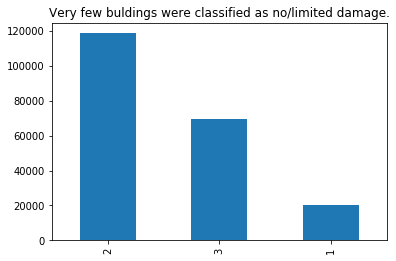

In [11]:
data_train['damage_grade'].value_counts().plot(kind='bar', 
                                         title="Very few buldings were classified as no/limited damage.")
plt.show()

The above graph provides us with a visual interpretation of the different damage grades.  We can see that the majority falls into the 2 category representing moderate damage.  This is to be expected.  It's interesting to note that very few buildings were classified as 1, represting no or minimal damage.

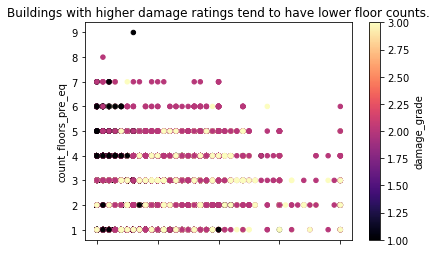

In [12]:
data_train[data_train['age'] < 800].plot.scatter(x='age',
                                     y='count_floors_pre_eq',
                                     c='damage_grade',
                                     colormap='magma',
                                     title='Buildings with higher damage ratings tend to have lower floor counts.')
plt.show()

The graph above shows the damage grade by number of floows.  It's very interesting to note that the buildings with more floors actually seemed to end up less damaged.  This seems coutnerintuitive at first, but our research about the Nepal 2015 earthquake says that the majority of damage was actually in rural areas.  We hypothesize that the taller buildings were on average better constructed.

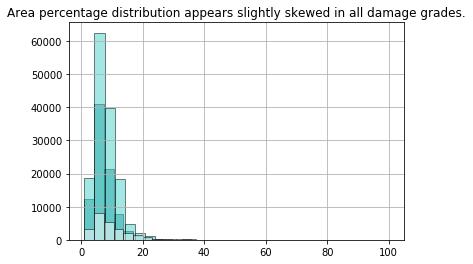

In [81]:
data[data['damage_grade'] == 3]['area_percentage'].hist(bins=30, 
                                                        edgecolor='black', 
                                                        color='teal', 
                                                        alpha=0.5)

data[data['damage_grade'] == 2]['area_percentage'].hist(bins=30, 
                                                        edgecolor='black', 
                                                        color='mediumturquoise', 
                                                        alpha=0.5)

data[data['damage_grade'] == 1]['area_percentage'].hist(bins=30, 
                                                        edgecolor='black', 
                                                        color='white', 
                                                        alpha=0.5)

plt.title('Area percentage distribution appears slightly skewed in all damage grades.')
plt.show()

The above graph explores the relationship between area percentage of a building and the distribution of damage scores.  We see a fairly constant distribution that follows a gaussian curve for each damage grade here.  Each curve is slightly skewed.

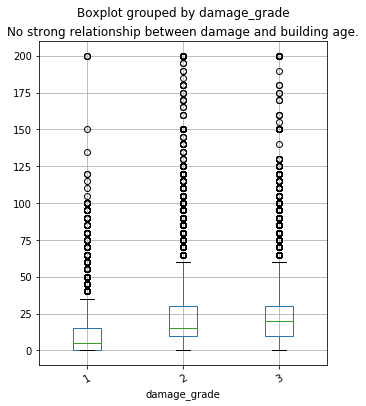

In [80]:
# Ouliers filtered out for this visual 
data_bp = data[data.age < 800]
data_bp.boxplot('age','damage_grade',rot = 30,figsize=(5,6))
plt.title('No strong relationship between damage and building age.')
plt.show()

We see here that the average age for categry 3 buildings was *slightly* higher than 2, but many buildings of various ages fell under all damage grade categories.

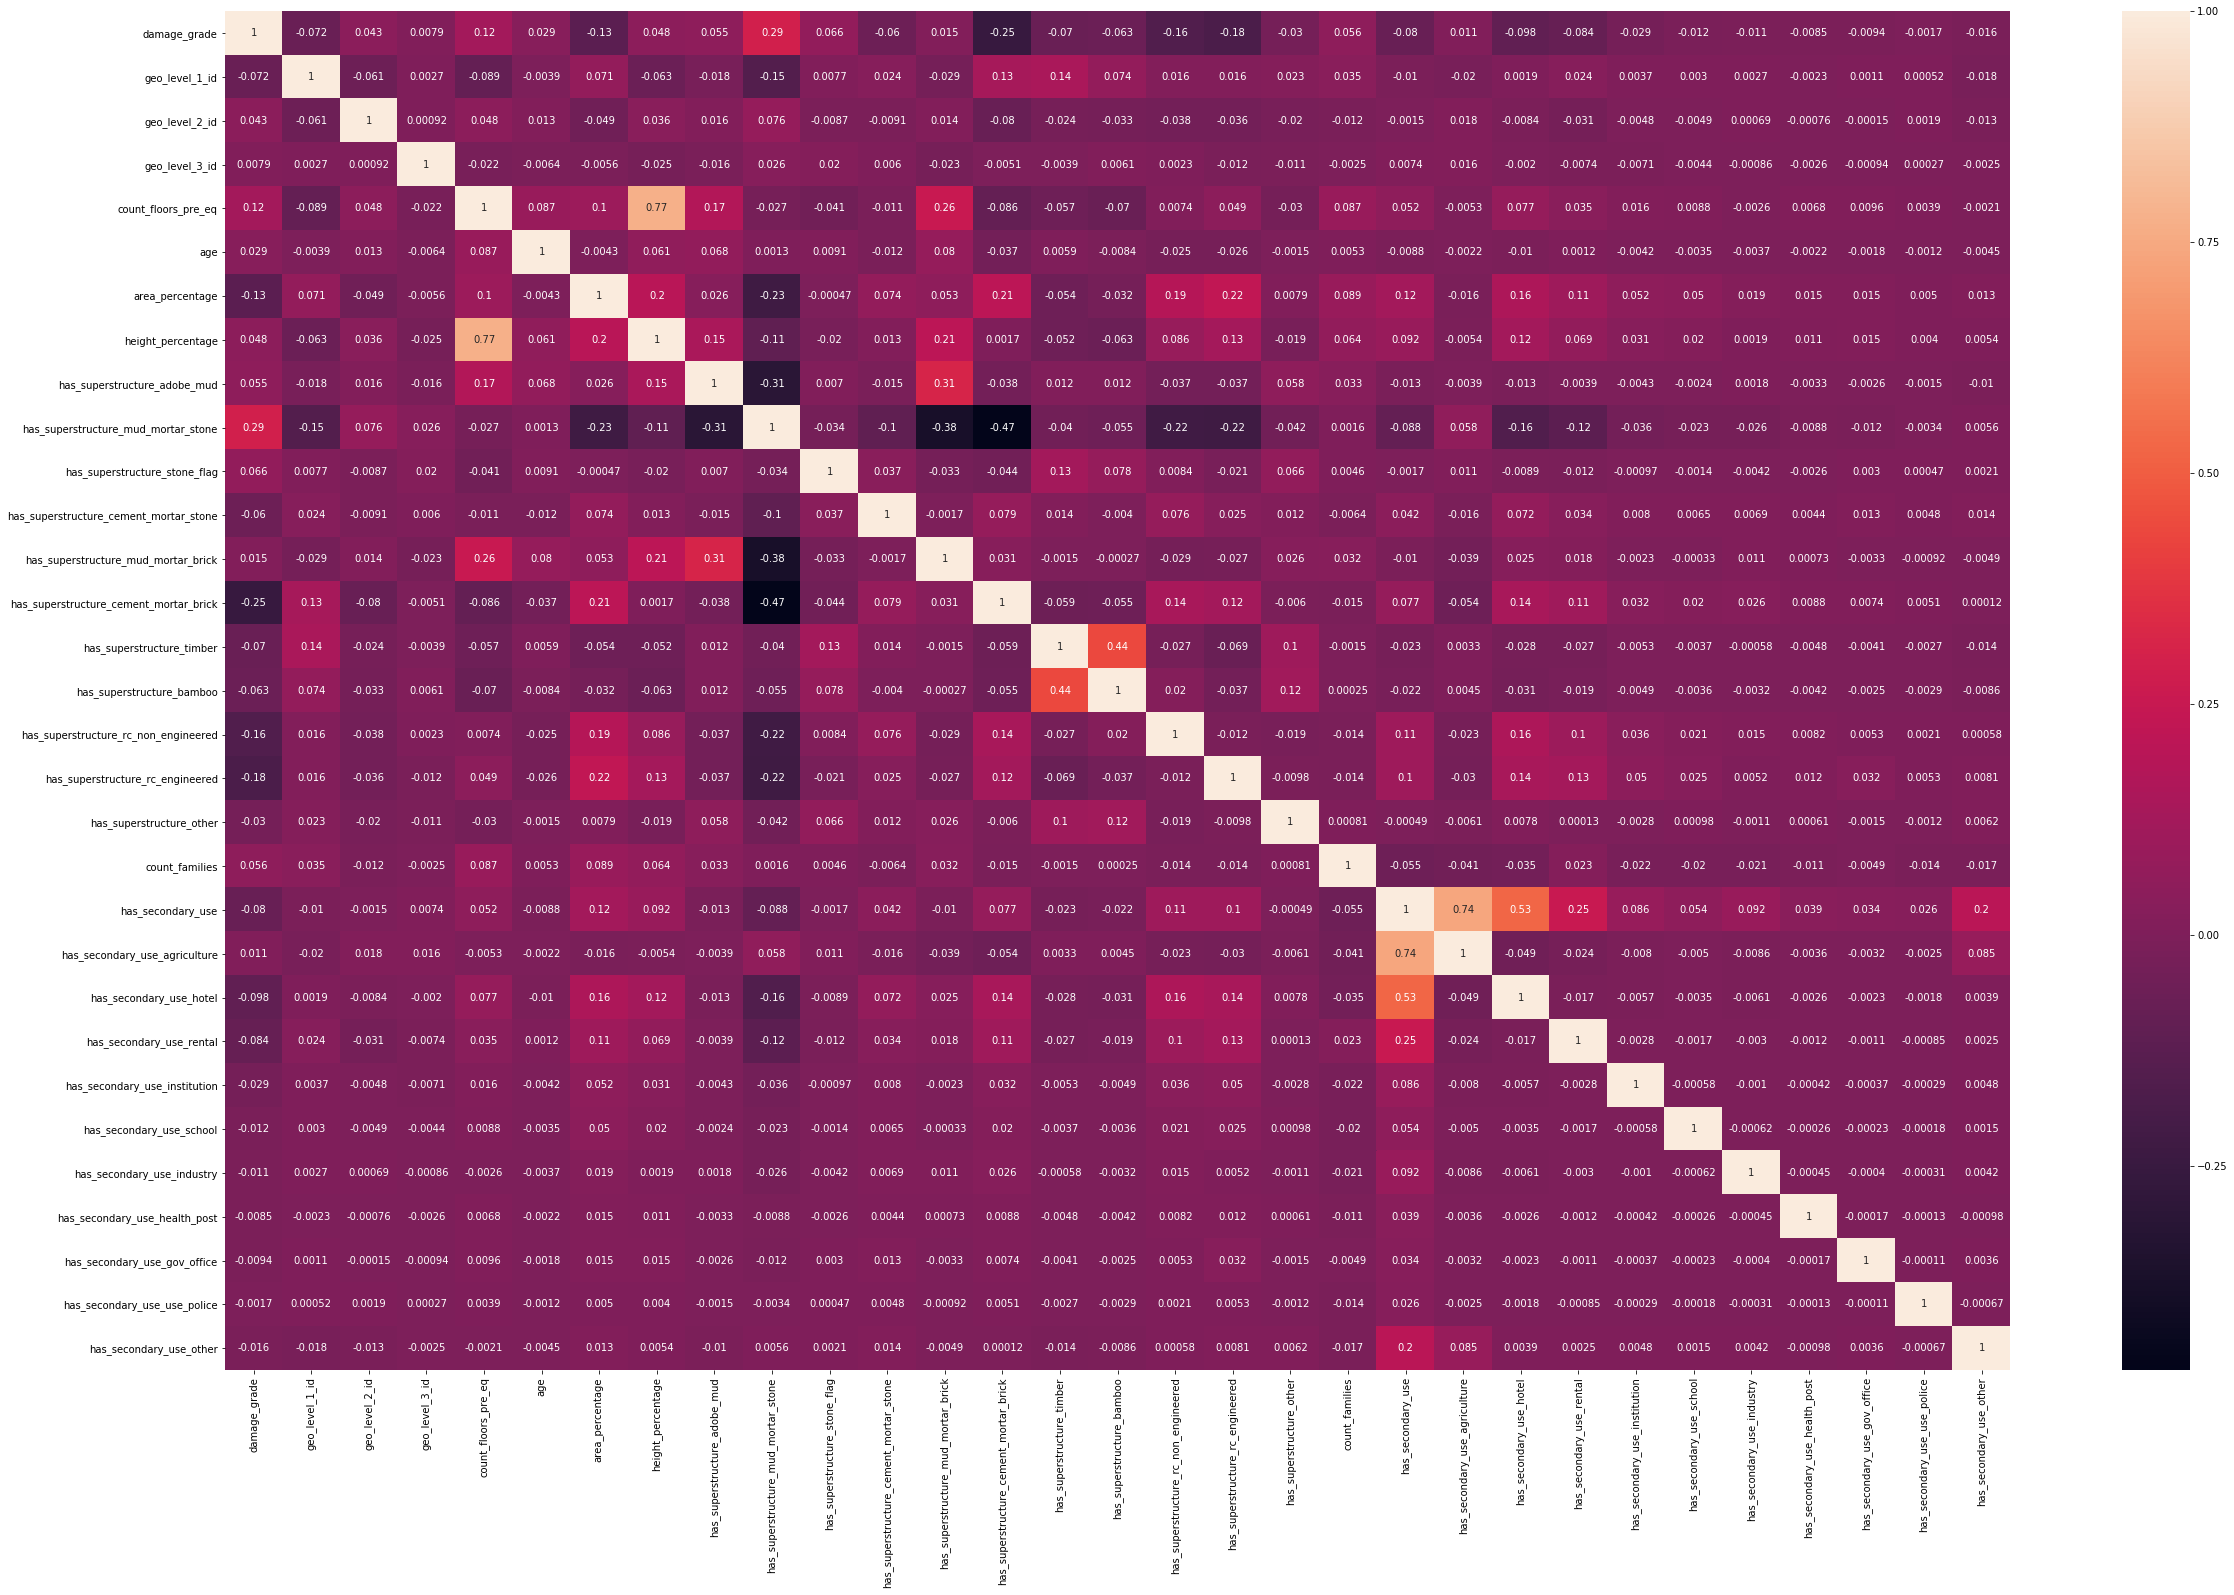

In [15]:
corr = data.corr()
plt.figure(figsize=(40,25)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

## Prepare Data for Classification Tasks

In [16]:
# Print number of unique categories in each categorical column
for col in categorical_cols:
  print(col,": ", data_train[col].unique().size)

geo_level_1_id :  31
geo_level_2_id :  1406
geo_level_3_id :  11404
land_surface_condition :  3
foundation_type :  5
roof_type :  3
ground_floor_type :  5
other_floor_type :  4
plan_configuration :  10
position :  4
legal_ownership_status :  4


Municipalities and wards are local authority areas created for governance and electoral purposes.  We are dropping these two columns before creating dummy variables for other categorical variables.  District is being used as a proxy to the distance from the epicenter.  Since we don't have locations for each building, it is not possible to obtain to obtain distance for each building from epicenter.

In [17]:
data_train = data_train.drop(['geo_level_2_id','geo_level_3_id'], axis = 1)
X_train = X_train.drop(['geo_level_2_id','geo_level_3_id'], axis = 1)

# creating boolean columns for the rest of the categories
categorical_cols.remove('geo_level_3_id')
categorical_cols.remove('geo_level_2_id')

data_train = pd.get_dummies(data=data_train, columns=categorical_cols)
X_train = pd.get_dummies(data=X_train, columns=categorical_cols)

print('Size of the dataset before some feature selection: ',X_train.shape)

Size of the dataset before some feature selection:  (208480, 96)


In [18]:
X_train.head()
categorical_cols

['geo_level_1_id',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'plan_configuration',
 'position',
 'legal_ownership_status']

In [19]:
data_train.shape

(208480, 97)

In [20]:
#constructing a for loop to find  list of cols to drop based on low correlation
corre = data_train.corr()['damage_grade'][:]

rm_cols = []
for i in corre.index:
  if (corre[i] <= 0.1 and corre[i] >= -0.1):
    rm_cols.append(i)

print(rm_cols)  
X_train_small = X_train.drop(rm_cols,axis = 1) 

print('Size of dataset after some feature selection: ', X_train_small.shape)

['age', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other', 'geo_level_1_id_0', 'geo_level_1_id_1', 'geo_level_1_id_2', 'geo_level_1_id_3', 'geo_level_1_id_4', 'geo_level_1_id_5', 'geo_level_1_id_6', 'geo_level_1_id_7', 'geo_level_1_id_9', 'geo_level_1_id_10', 'geo_level_1_id_11', 'geo_level_1_id_12', 'geo_level_1_id_13', 'geo_level_1_id_14', 'geo_level_1_id_15', 'geo_level_1_id_16', 'geo_level_1_id_18', 'geo_level_1_id_19', 'geo_level_1_id_22', 'geo_le

## Shortlisting Promising Models - Classification
We have chosen to compare Naive Bayes, Random Forests, Logistic Regression, and ADABoost Decision Trees.

In [21]:
# We saw that the data was imbalance. First we fix that using SMOTE technique.
# For this we first need a list of the categorical variables in the data set

# getting all columns
all_cols = set(X_train_small.columns)
# removing non categorical columns
cat_cols = all_cols.difference(numerical_cols)
# getting the index of these categorical columns
cat_idx = [X_train_small.columns.get_loc(c) for c in cat_cols]

from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=cat_idx)
X_train_resam, y_train_resam = sm.fit_resample(X_train_small, 
                                               y_train.values.ravel())

C:\Users\murie\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [22]:
# checking again to see balance 
np.unique(y_train_resam, return_counts=True)

# As we can see the data is now balanced

(array([1, 2, 3], dtype=int64), array([118556, 118556, 118556], dtype=int64))

In [23]:
# importing sklearn classes
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#### Naive Bayes

In [27]:
clf_nb = GaussianNB()
clf_nb.fit(X_train_resam, y_train_resam)
y_pred = clf_nb.predict(X_train_resam)

print("f1 score:", metrics.f1_score(y_train_resam, 
                                    y_pred, 
                                    average='weighted'))

f1 score: 0.5052622301780819


#### Random Forests

In [28]:
clf_rf=RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train_resam, y_train_resam)
y_pred = clf_rf.predict(X_train_resam)

print("f1 score:", metrics.f1_score(y_train_resam, 
                                    y_pred, 
                                    average='weighted'))

f1 score: 0.6610324554858479


#### Multiclass Logistic Regression

In [29]:
clf_lr = LogisticRegression(solver = 'lbfgs', 
                            multi_class = 'multinomial', 
                            max_iter = 1000)
clf_lr.fit(X_train_resam, y_train_resam)
y_pred = clf_lr.predict(X_train_resam) 

print("f1 score:",metrics.f1_score(y_train_resam, 
                                   y_pred, 
                                   average='weighted'))

f1 score: 0.6071923217253787


#### ADABoost Decision Trees

In [30]:
clf_ab = AdaBoostClassifier(n_estimators=200, random_state=0)
clf_ab.fit(X_train_resam, y_train_resam)
y_pred = clf_ab.predict(X_train_resam)

print("f1 score:",metrics.f1_score(y_train_resam, 
                                   y_pred, 
                                   average='weighted'))

f1 score: 0.6076969661465301


## Final Classification: Random Forests
Random Forests performed the best during the model fitting exercise.  Here we perform the final classification on the reserved testing data that was saved to avoid overfitting.

In [31]:
# Prepare testing data like training data
# Get rid of wards and municipalities
X_test = X_test.drop(['geo_level_2_id','geo_level_3_id'], axis = 1)

# Form dummy variables
X_test = pd.get_dummies(data=X_test, columns=categorical_cols)

# Drop unnecessary features
X_test = X_test.drop(rm_cols,axis = 1) 

In [56]:
# Test data accuracy
y_pred = clf_rf.predict(X_test)
print("f1 score on test sample:", metrics.f1_score(y_test, 
                                                   y_pred, 
                                                   average='weighted'))

f1 score on test sample: 0.6061413692865079


In [57]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.58      0.40      0.47      7235
           2       0.63      0.68      0.66     27719
           3       0.56      0.56      0.56     17167

    accuracy                           0.60     52121
   macro avg       0.59      0.55      0.56     52121
weighted avg       0.60      0.60      0.60     52121



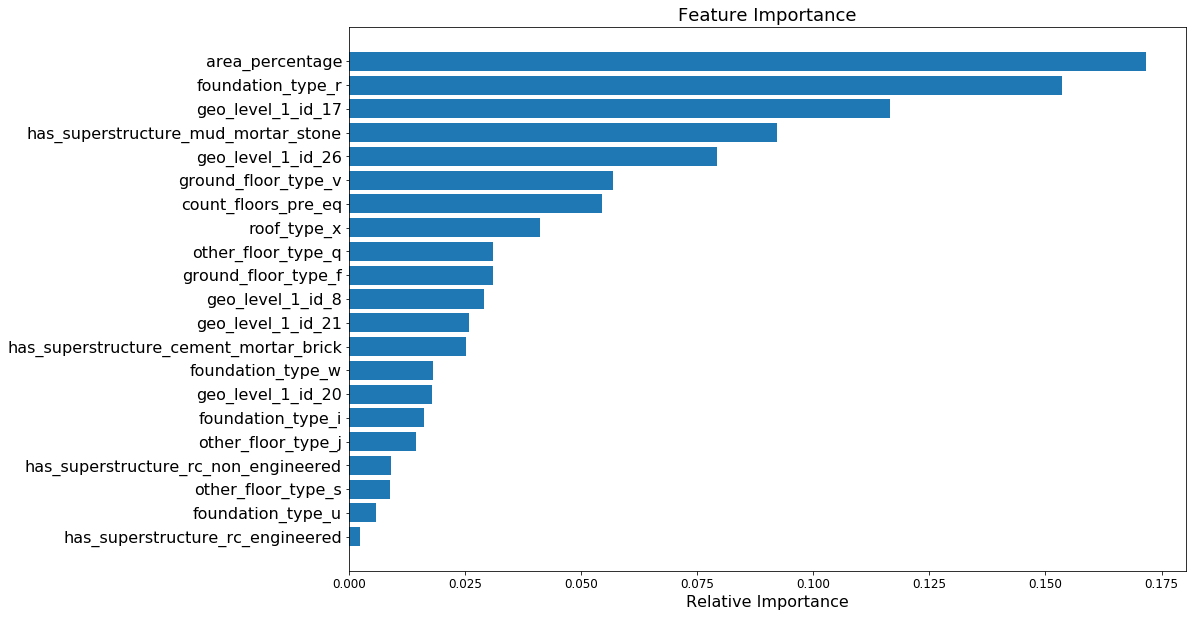

In [88]:
# Find feature important to plot
features = X_test.columns
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

# Format plot output
plt.figure(figsize = (15,10))
plt.title('Feature Importance', size = 18)
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), features[indices], size = 16)
plt.xlabel('Relative Importance', size = 16)
plt.show()

## Conclusion
Because accuracy can be largely contributed by a large number of True Negatives, we wanted to focus on False Negatives and False Positives and so chose to use f1 scores as our performance metric in choosing a model.  The Random Forest Model outperformed the others and so that was the model we chose to compare to our testing data.  <br> <br>
The accuracy of our model was 0.6, and the precission, recall, and f1 score are listed above in the performance metrics.  We see that recall is higher in categorizing damage grades of 2 and 3, which is what we were hoping to see.  While the performance metrics are not exceptionally high, this is still a step in the right direction in that it provides some guidance here there wasn't before. <br> <br>
The important features are also outlined in the graph above.  Area percentage was, surprisingly, the most predictive feature.  Specific foundation types, geographic locations, and structural materials were all important as well as number of floors and types of floors and roofs.  

#### Business Value
* *Government Agencies*: Allow for proactive measures to impose regulatory standards on high-risk buildings, potentially resulting in more lives saved and the reactive disaster relief expenditure reduced due to reduced damage. 
* *Consumers buying houses*: Information on the importance of various property characteristics can allow for more informed decisions while purchasing property, especially in earthquake-prone countries.
* *Zillow, 99accres, etc.*: Ability to assign an earthquake safety score to the listings on their website thereby increasing the website’s appeal to consumers in real estate. 
* *Insurance Companies*: Potentially faster claims processing in the wake of a disaster, allowing for both higher business revenue and for more financial help to go to community members more quickly.

## Some Limitations of our work
* We have not tuned the hyperparamters of our models. This would be the next step in further improving the better performing models.
* While the application of our model is "Earthquake Damage Assessment Tool", the analysis we have done above is based only on data from a single earthquake of a fixed magnitude. 

## Limitation of data 
* This data was collected through an extremely large scale survey and the numbers are self reported.

## Suggested future improvements
* If such data from several earthquakes can be combined and earthquake magnitude be incorporated as a feature, then this can potentially be used to estimate damage for future earthquakes. 
* Such a tool can also be adopted and adapted for other natural disasters. 